<a href="https://colab.research.google.com/github/rohailkhan/Deep-Learning-with-Python-Jb/blob/master/10_Image_classification_of_hand_written_digits_without_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image clasification without using Convolution Nueral Network
### Only using dense layers

In [105]:
# Plot ad hoc mnist instances
from keras.datasets import mnist


In [106]:
from keras.models import Sequential
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical

In [107]:
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [108]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

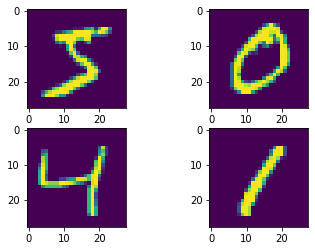

In [109]:
plt.subplot(2,2,1)
plt.imshow(X_train[0])

plt.subplot(2,2,2)
plt.imshow(X_train[1])

plt.subplot(2,2,3)
plt.imshow(X_train[2])
plt.subplot(2,2,4)
plt.imshow(X_train[3])

plt.show()

In [110]:
X_train.shape , X_test.shape , y_train.shape ,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [111]:
total_pixels=28*28
total_pixels

784

In [112]:
(X_train.reshape(-1,total_pixels)/255).astype('float').shape , (X_test.reshape(-1,total_pixels)/255).astype('float').shape , to_categorical(y_train).shape ,to_categorical(y_test ).shape


((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [113]:
X_train=(X_train.reshape(-1,total_pixels)/255).astype('float')
X_test=(X_test.reshape(-1,total_pixels)/255).astype('float')

In [114]:
y_train=to_categorical(y_train)

In [115]:
y_test=to_categorical(y_test)

In [116]:
model=Sequential()
model.add(Dense(units=120,input_dim=total_pixels,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
  metrics=['accuracy'])

In [117]:
model_history=model.fit(X_train,y_train,epochs=10,batch_size=100)

Epoch 1/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3390 - accuracy: 0.9063
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1588 - accuracy: 0.9541
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1142 - accuracy: 0.9664
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0885 - accuracy: 0.9744
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0726 - accuracy: 0.9788
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0606 - accuracy: 0.9824
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0496 - accuracy: 0.9857
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0432 - accuracy: 0.9877
Epoch 9/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0357 - accuracy: 0.9902
Epoch 10/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0298 - accuracy: 0.9919

In [118]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 97.67%


# Saving the model

In [119]:
path='/content/drive/MyDrive/20210309_Files/'

In [120]:
model_path=path +'/digits_model1.h5'
# saving model
model.save(model_path,overwrite=True)

# Saving History of loss and accuracy

In [125]:
import json
# # Get the dictionary containing each metric and the loss for each epoch
history_dict = model_history.history

In [126]:
# # Save it under the form of a json file
history_path=path +'/history_digits_model1.json'
json.dump(str(history_dict), open(history_path, 'w'))

# Loading saved model

In [127]:
from keras.models import load_model 
model_path=path +'/digits_model1.h5'
loaded_model = load_model(model_path) 

In [128]:
# Predict on the first 5 test images.
predictions = loaded_model.predict(X_test[:5])

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]



[7 2 1 0 4]


In [129]:
# Check our predictions against the ground truths.
print(np.argmax(y_test[:5],axis=1)) # [7, 2, 1, 0, 4]

[7 2 1 0 4]


# Loading History of Accuracy and Losses of the Model

In [96]:
history_path=path +'/history_digits_model1.json'
history= json.load(open(history_path, 'r'))

### The loaded history is in String format.Converting it back to dictionary

In [97]:
# The loaded history is in String format.Converting it back to
# dictionary
import ast
history_1=ast.literal_eval(history)

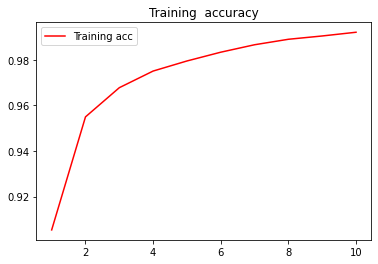

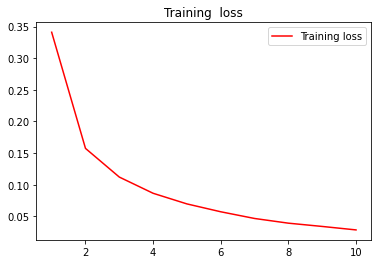

In [100]:
### .
acc = history_1['accuracy']
#acc=np.array(acc)

#val_acc=np.array(val_acc)
loss = history_1['loss']

epochs = range(1, len(acc) + 1)
acc=np.array(acc)

plt.plot(epochs, np.array(acc), 'r', label='Training acc')

plt.title('Training  accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training  loss')
plt.legend()
plt.show()